In [2]:
import pandas as pd 
from pandas import Series , DataFrame

import numpy as np 


In [3]:
import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline

In [12]:
import glob

In [31]:
path =r'Datasets/' # use your path
allFiles = glob.glob(path + "/*.csv")
print len(allFiles)
main = DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
main = pd.concat(list_)
main.reset_index(inplace=True)
main.drop('index',axis=1,inplace=True)

48


In [32]:
main.index.unique()

array([     0,      1,      2, ..., 121443, 121444, 121445], dtype=int64)

In [35]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121446 entries, 0 to 121445
Data columns (total 17 columns):
Date                                   121446 non-null object
Region                                 121446 non-null object
Station Name                           121446 non-null object
Mode of Transport                      121446 non-null object
Station Name.1                         121446 non-null object
Utility                                121446 non-null object
Sector                                 121446 non-null object
Capacity                               121446 non-null float64
Normative Stocks Required (In Days)    121446 non-null float64
Daily Requirement                      121446 non-null float64
Actual Stock - Import                  121446 non-null float64
Actual Stock - Indigenous              121446 non-null float64
Actual Stock - Total                   121446 non-null float64
Actual Stock - Days                    121446 non-null int64
Critical        

In [49]:
main.head()

,Date,Region,Station Name,Mode of Transport,Station Name.1,Utility,Sector,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days,Critical,Super Critical,Remarks
0,2009-04-01,NORTHERN,DELHI,RAIL,I.P. T.P.S.,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,247.5,25.0,3.2,0.0,57.03,57.03,18,NaN,NaN,NaN
1,2009-04-01,NORTHERN,DELHI,RAIL,RAJGHAT TPS,INDRAPRASTHA POWER GENERATION COMPANY LIMITED,STATE,135.0,25.0,2.2,0.0,105.08,105.08,48,NaN,NaN,NaN
2,2009-04-01,NORTHERN,DELHI,RAIL,BADARPUR TPS,NTPC LIMITED.,CENTRAL,705.0,30.0,13.8,0.0,13.17,13.17,1,Critical,Super Critical,NaN
3,2009-04-01,NORTHERN,HARYANA,RAIL,FARIDABAD TPS.,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,55.0,25.0,2.0,0.0,14.96,14.96,7,NaN,NaN,NaN
4,2009-04-01,NORTHERN,HARYANA,RAIL,PANIPAT TPS,HARYANA POWER GENERATION CORPORATION LIMITED,STATE,1360.0,25.0,25.0,0.0,111.27,111.27,4,Critical,NaN,NaN


In [43]:
main[(main['Super Critical'].notnull())].describe()

,Capacity,Normative Stocks Required (In Days),Daily Requirement,Actual Stock - Import,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days
count,25314.000000,25314.000000,25314.000000,25314.000000,25314.000000,25314.000000,25314.000000
mean,1391.106483,22.529825,18.122189,1.128005,27.542525,28.670497,1.632614
std,856.369835,5.167521,12.912343,4.701261,29.069547,29.054860,1.099328
min,55.000000,15.000000,0.700000,0.000000,0.000000,0.000000,0.000000
25%,630.000000,20.000000,7.800000,0.000000,5.900000,6.740000,1.000000
50%,1240.000000,20.000000,15.700000,0.000000,18.820000,20.895000,2.000000
75%,2000.000000,25.000000,24.200000,0.000000,40.747500,42.110000,3.000000
max,4620.000000,30.000000,65.000000,62.870000,205.470000,205.470000,3.000000


In [60]:
numeric = main[(main['Critical'].notnull())].describe().columns

In [56]:
len(df.Utility.unique())

33

In [57]:
len(main.Utility.unique())

35

In [65]:
groupby=DataFrame(main.groupby(['Station Name.1'])[numeric].mean()).reset_index()

In [73]:
A=groupby[['Station Name.1','Capacity']]

In [83]:
A.to_csv('values.csv')

In [94]:
B=main[(main['Station Name.1']=='ANPARA TPS')&(main['Capacity']!=1630)][['Date','Capacity']]

In [110]:
req=main.columns[9:-3]

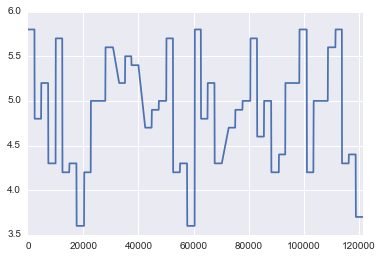

In [113]:
main[main['Station Name.1']=='AMARKANTAK EXT TPS'][req[0]].plot()

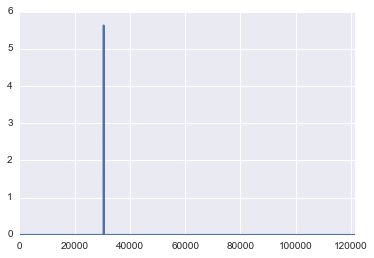

In [114]:
main[main['Station Name.1']=='AMARKANTAK EXT TPS'][req[1]].plot()

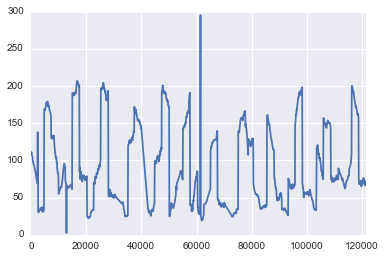

In [115]:
main[main['Station Name.1']=='AMARKANTAK EXT TPS'][req[2]].plot()

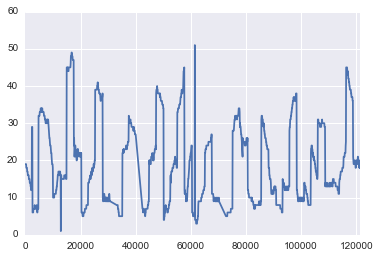

In [124]:
main[main['Station Name.1']=='AMARKANTAK EXT TPS'][req[4]].plot()

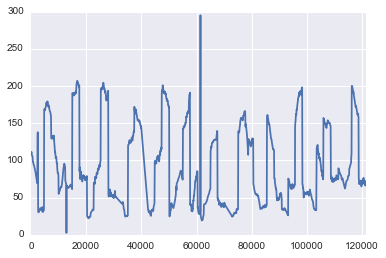

In [125]:
main[main['Station Name.1']=='AMARKANTAK EXT TPS'][req[3]].plot()

In [126]:
main[main['Station Name.1']=='ANPARA TPS'][[req[2],req[3],req[4]]].corr()

,Actual Stock - Indigenous,Actual Stock - Total,Actual Stock - Days
Actual Stock - Indigenous,1.000000,1.000000,0.973706
Actual Stock - Total,1.000000,1.000000,0.973706
Actual Stock - Days,0.973706,0.973706,1.000000


Daily Requirement
Actual Stock - Import
Actual Stock - Indigenous
Actual Stock - Total
Actual Stock - Days


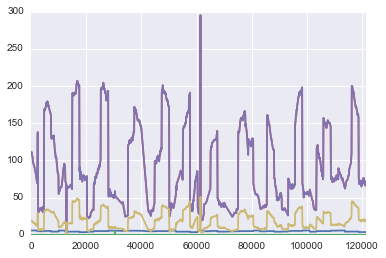

In [112]:
for col in req:
    print col
    main[main['Station Name.1']=='AMARKANTAK EXT TPS'][col].plot()
    

In [98]:
main.groupby('Station Name.1')['Normative Stocks Required (In Days)'].mean()

Station Name.1
AMAR KANTAK                     15.000000
AMARKANTAK EXT TPS              15.000000
ANPARA C TPS                    25.000000
ANPARA TPS                      15.000000
BADARPUR TPS                    30.000000
BAKRESWAR TPS                   25.000000
BANDEL TPS                      20.000000
BARAUNI TPS                     20.000000
BARKHERA TPS                    25.000000
BELLARY TPS                     22.416679
BHILAI TPS                      25.000000
BHUSAWAL TPS                    22.181507
BOKARO `B` TPS                  20.000000
BUDGE BUDGE TPS                 20.000000
CHANDRAPUR(MAHARASHTRA) STPS    20.000000
CHANDRAPURA(DVC) TPS            20.000000
CHHABRA TPP                     30.000000
D.P.L. TPS                      22.828630
DADRI (NCTPP)                   30.000000
DAHANU TPS                      25.000000
DSPM TPS                        15.000000
DURGAPUR STEEL TPS              20.000000
DURGAPUR TPS                    20.000000
Dr. N.TATA RAO TPS 

In [134]:
preprocessed=main.pivot_table(index=['Station Name.1','Capacity','Normative Stocks Required (In Days)'],columns='Date',values='Actual Stock - Total').reset_index()

In [135]:
len(preprocessed)

114

In [136]:
preprocessed.shape

(114, 1464)

In [138]:
reprocessed.columns[0:3]

Index([u'Station Name.1', u'Capacity', u'Normative Stocks Required (In Days)'], dtype='object', name=u'Date')

In [140]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ggplot import *

In [142]:
feature_col= preprocessed.columns[1:-1]
print (feature_col)

Index([u'Capacity', u'Normative Stocks Required (In Days)', u'2009-01-01',
       u'2009-01-02', u'2009-01-03', u'2009-01-04', u'2009-01-05',
       u'2009-01-06', u'2009-01-07', u'2009-01-08',
       ...
       u'2012-12-21', u'2012-12-22', u'2012-12-23', u'2012-12-24',
       u'2012-12-25', u'2012-12-26', u'2012-12-27', u'2012-12-28',
       u'2012-12-29', u'2012-12-30'],
      dtype='object', name=u'Date', length=1462)


In [143]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [157]:
preprocessed.fillna(0,inplace=True)

In [158]:
from collections import defaultdict

In [159]:
X=preprocessed[feature_col]

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

lst=defaultdict(float)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print ("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    lst[n_clusters]=silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.48022746355247148)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.35177899374878679)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.28707224392383168)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.30448030378679997)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.28949971110491424)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.24315152084578676)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.21707550108862322)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.22825315351913864)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.18580979836861716)


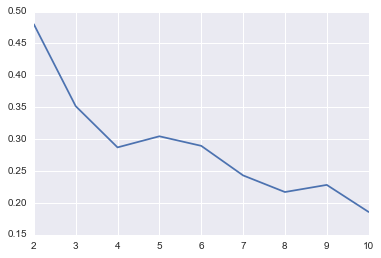

In [160]:
plt.plot(lst.keys(),lst.values())

In [173]:
cluster = KMeans(n_clusters=4)

preprocessed['cluster'] = cluster.fit_predict(preprocessed[preprocessed.columns[1:]])
preprocessed.cluster.value_counts()

2    59
0    35
3    12
1     8
Name: cluster, dtype: int64

In [174]:
pca = PCA(n_components=2)
preprocessed['x'] = pca.fit_transform(preprocessed[feature_col])[:,0]
preprocessed['y'] = pca.fit_transform(preprocessed[feature_col])[:,1]
#df = df.reset_index()

customer_clusters = preprocessed[['Station Name.1', 'cluster', 'x', 'y']]
customer_clusters.head()

Date,Station Name.1,cluster,x,y
0,AMAR KANTAK,2,-3636.449849,560.563611
1,AMARKANTAK EXT TPS,0,-790.019634,-1241.068339
2,ANPARA C TPS,2,-3621.959723,200.629744
3,ANPARA TPS,0,3242.658961,-1602.579207
4,ANPARA TPS,2,-2742.014308,944.296616


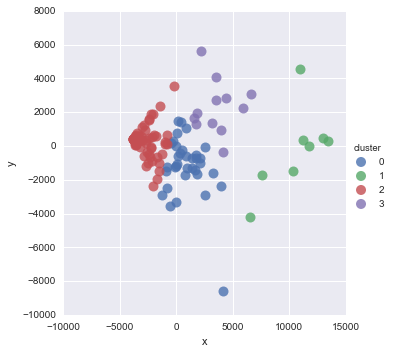

In [175]:

sns.lmplot("x", "y", data=customer_clusters, hue='cluster', fit_reg=False,scatter_kws={"marker": "D",
                        "s": 100})

In [176]:
customer_clusters.to_csv('Output_segment.csv')

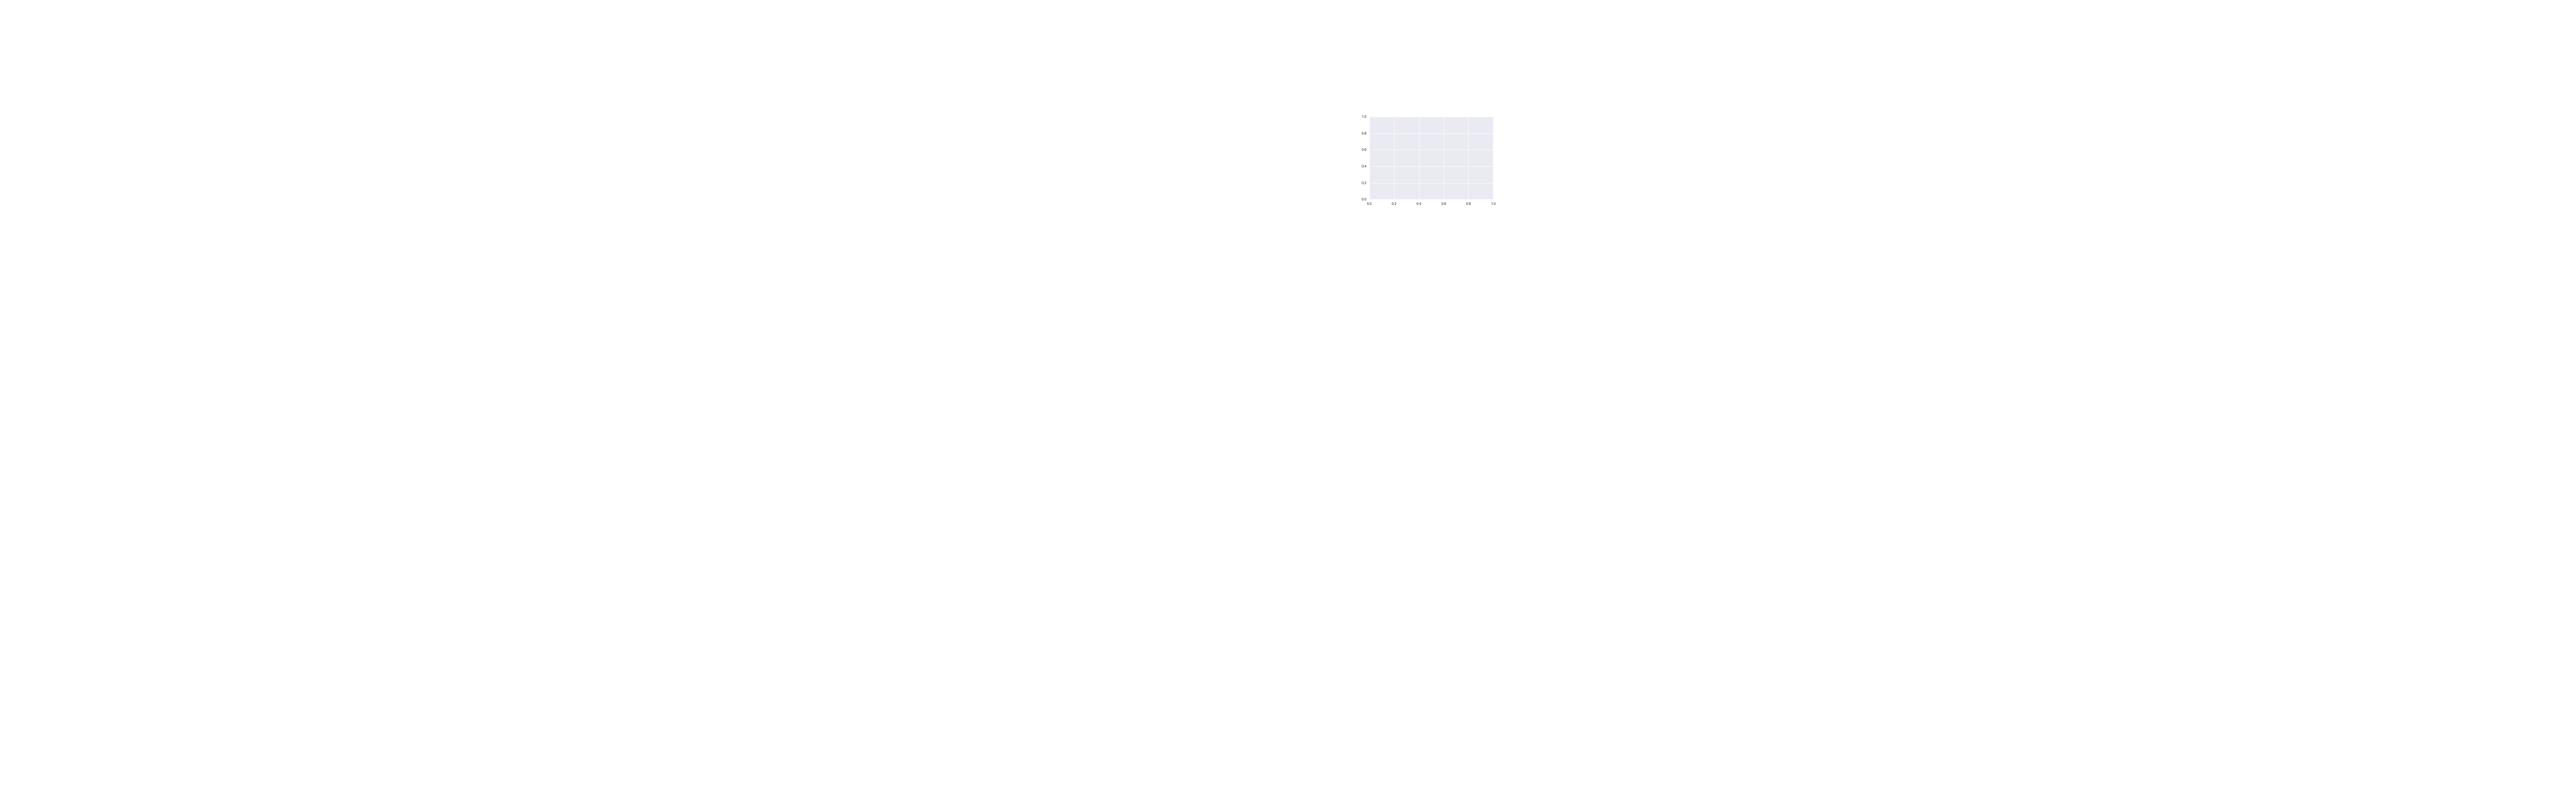

In [185]:
fig, ax = plt.subplots()
fig=plt.figure(figsize=(10,10))

for i, txt in enumerate(customer_clusters):
    #print i 
    ax.annotate(customer_clusters['Station Name.1'][i], (customer_clusters['x'][i],customer_clusters['y'][i]))

In [179]:
len(preprocessed)

114

In [180]:
preprocessed['Station Name.1'][0]

'AMAR KANTAK'